In [61]:
import pandas as pd
import numpy as np
from tools import *
import os
import preprocessor

In [62]:
df = pd.read_csv('data/diabetic_data.csv')

In [63]:

preprocessor_eda=preprocessor.Train_preprocessor('data/mapping_json',binary=True)
df=preprocessor_eda.transform_eda(df)


c:\Users\mario\OneDrive\Documentos\TAAU\TAAU\preprocessor.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diag_1'] = df['diag_1'].map(d).astype(int)
c:\Users\mario\OneDrive\Documentos\TAAU\TAAU\preprocessor.py:152: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diag_2'] = df['diag_2'].map(d).astype(int)
c:\Users\mario\OneDrive\Documentos\TAAU\TAAU\preprocessor.py:153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [64]:
import pandas as pd
import numpy as np

# Suponiendo que df es tu DataFrame
# df = pd.read_csv('tu_archivo.csv')  # Descomenta y ajusta la ruta del archivo si es necesario

# Reemplaza 'NULL', 'null', y '?' con np.nan
df.replace(['NULL', 'null', '?'], np.nan, inplace=True)

# Calcula el porcentaje de valores nulos en cada columna
porcentaje_nulos = df.isnull().mean() * 100

# Filtra y muestra las columnas con más del 10% de valores nulos
columnas_con_nulos_altos = porcentaje_nulos[porcentaje_nulos > 10]

if not columnas_con_nulos_altos.empty:
    print("Columnas con más del 10% de valores nulos:")
    print(columnas_con_nulos_altos)
else:
    print("No hay columnas con más del 10% de valores nulos.")
df=df.drop(columns=['weight','medical_specialty'])

Columnas con más del 10% de valores nulos:
weight               96.063033
medical_specialty    48.392682
dtype: float64


In [65]:
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,n_service_uses,sqrt_n_service_uses,medication/day
2,1,0,25,emergency,home,Emergency Room,2,11,5,13,...,No,No,No,No,0,1,1,3,1.732051,6.500000
3,2,1,35,emergency,home,Emergency Room,2,44,1,16,...,No,No,No,No,1,1,1,0,0.000000,8.000000
4,2,1,45,emergency,home,Emergency Room,1,51,0,8,...,No,No,No,No,1,1,1,0,0.000000,8.000000
6,2,1,65,elective,home,Clinic Referral,4,70,1,21,...,No,No,No,No,1,1,1,0,0.000000,5.250000
8,2,0,85,urgent,home,Transfer from a hospital,13,68,2,28,...,No,No,No,No,1,1,1,0,0.000000,2.153846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101334,2,1,85,emergency,home,Emergency Room,5,63,0,9,...,No,No,No,No,1,1,0,0,0.000000,1.800000
101342,2,0,75,urgent,home,Physician Referral,5,52,1,24,...,No,No,No,No,1,1,0,1,1.000000,4.800000
101386,2,1,75,urgent,home,Physician Referral,4,20,0,19,...,No,No,No,No,1,1,0,0,0.000000,4.750000
101391,2,1,45,emergency,home,Emergency Room,5,64,0,19,...,No,No,No,No,0,1,0,5,2.236068,3.800000


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57176 entries, 2 to 101667
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   race                      57176 non-null  int64  
 1   gender                    57176 non-null  int32  
 2   age                       57176 non-null  int64  
 3   admission_type_id         57176 non-null  object 
 4   discharge_disposition_id  57176 non-null  object 
 5   admission_source_id       57176 non-null  object 
 6   time_in_hospital          57176 non-null  int64  
 7   num_lab_procedures        57176 non-null  int64  
 8   num_procedures            57176 non-null  int64  
 9   num_medications           57176 non-null  int64  
 10  diag_1                    57176 non-null  int32  
 11  diag_2                    57176 non-null  int32  
 12  diag_3                    57176 non-null  int32  
 13  number_diagnoses          57176 non-null  int64  
 14  max_g

# Variables review

## race

In [67]:
print(df['race'].value_counts())
print(df['race'].isnull().sum())
df=df.dropna(subset='race')

2    43506
1    11158
5     1138
3      965
4      409
Name: race, dtype: int64
0


## time in hospital

In [68]:
print(df['time_in_hospital'].value_counts())
print(df['time_in_hospital'].isnull().sum())

3     10146
2     10031
1      8338
4      7743
5      5528
6      4142
7      3258
8      2332
9      1557
10     1240
11      970
12      742
13      622
14      527
Name: time_in_hospital, dtype: int64
0


# num_lab_procedures        

1      1943
43     1610
45     1361
44     1355
38     1326
       ... 
118       1
104       1
105       1
109       1
132       1
Name: num_lab_procedures, Length: 113, dtype: int64
0


<Axes: >

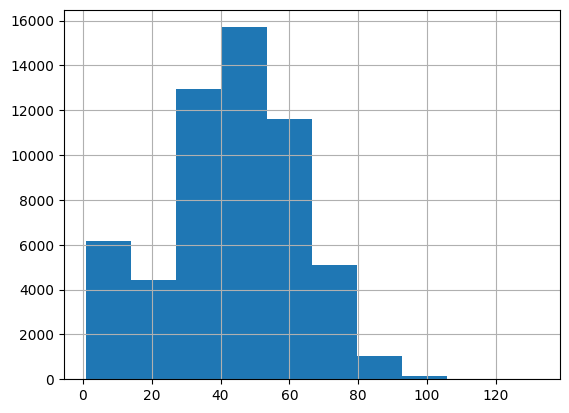

In [69]:
print(df['num_lab_procedures'].value_counts())
print(df['num_lab_procedures'].isnull().sum())      
df['num_lab_procedures'].hist()

## diag

In [70]:
print(df['diag_1'].value_counts())
print(df['diag_1'].isnull().sum())   

6     17600
2      5807
7      5323
8      5185
15     4453
16     3876
12     3205
9      2913
1      2099
11     1467
0      1449
4      1249
5       728
18      699
3       566
10      522
13       34
17        1
Name: diag_1, dtype: int64
0


In [71]:
print(df['diag_2'].value_counts())
print(df['diag_2'].isnull().sum())   

6     17890
2     12029
7      5373
9      4388
15     2643
8      2224
11     1859
3      1690
16     1509
4      1486
1      1346
12     1055
18     1038
0      1014
5       768
17      464
10      333
13       67
Name: diag_2, dtype: int64
0


In [72]:
print(df['diag_3'].value_counts())
print(df['diag_3'].isnull().sum())   

6     17197
2     15544
7      3553
9      3223
15     2598
18     2257
8      1975
4      1757
3      1448
11     1256
16     1170
12     1125
5      1023
0      1020
1       978
17      741
10      248
13       63
Name: diag_3, dtype: int64
0


In [73]:
df=df.dropna(subset=['diag_1','diag_2','diag_3'])

## Medications

In [74]:
for i in df.columns[16:39]:
    print(df[i].value_counts())
    print(df[i].isnull().sum()) 

-2    44912
 0    11250
 1      664
-1      350
Name: metformin, dtype: int64
0
No        56340
Steady      745
Up           66
Down         25
Name: repaglinide, dtype: int64
0
No        56710
Steady      444
Up           14
Down          8
Name: nateglinide, dtype: int64
0
No        57135
Steady       37
Up            3
Down          1
Name: chlorpropamide, dtype: int64
0
No        53961
Steady     2905
Up          188
Down        122
Name: glimepiride, dtype: int64
0
No        57175
Steady        1
Name: acetohexamide, dtype: int64
0
No        49776
Steady     6650
Up          452
Down        298
Name: glipizide, dtype: int64
0
No        51140
Steady     5265
Up          472
Down        299
Name: glyburide, dtype: int64
0
No        57165
Steady       11
Name: tolbutamide, dtype: int64
0
No        52774
Steady     4193
Up          146
Down         63
Name: pioglitazone, dtype: int64
0
No        53346
Steady     3672
Up          107
Down         51
Name: rosiglitazone, dtype: int64
0


In [75]:
import pandas as pd

# Suponiendo que df es tu DataFrame
# df = pd.read_csv('tu_archivo.csv')  # Descomenta y ajusta la ruta del archivo si es necesario

# Umbral para considerar una distribución desbalanceada (p. ej., 80%)
umbral_desbalance = 0.8

# Identifica y elimina las columnas con distribuciones desbalanceadas
columnas_a_eliminar = []
for columna in df.columns:
    max_freq = df[columna].value_counts(normalize=True).max()
    if max_freq > umbral_desbalance:
        columnas_a_eliminar.append(columna)
        print(f"Columna '{columna}' eliminada: máxima frecuencia = {max_freq}")

# Eliminar las columnas desbalanceadas
df.drop(columns=columnas_a_eliminar, inplace=True)

# Imprimir las columnas que se mantienen
print("Columnas restantes después de la eliminación:")
for columna in df.columns:
    print(columna)


Columna 'max_glu_serum' eliminada: máxima frecuencia = 0.9977438085910172
Columna 'A1Cresult' eliminada: máxima frecuencia = 0.8149748146075276
Columna 'repaglinide' eliminada: máxima frecuencia = 0.9853784804813208
Columna 'nateglinide' eliminada: máxima frecuencia = 0.9918497271582483
Columna 'chlorpropamide' eliminada: máxima frecuencia = 0.9992829159087729
Columna 'glimepiride' eliminada: máxima frecuencia = 0.9437701133342661
Columna 'acetohexamide' eliminada: máxima frecuencia = 0.9999825101441164
Columna 'glipizide' eliminada: máxima frecuencia = 0.8705750664614523
Columna 'glyburide' eliminada: máxima frecuencia = 0.8944312298866657
Columna 'tolbutamide' eliminada: máxima frecuencia = 0.9998076115852805
Columna 'pioglitazone' eliminada: máxima frecuencia = 0.9230096544004477
Columna 'rosiglitazone' eliminada: máxima frecuencia = 0.9330138519658598
Columna 'acarbose' eliminada: máxima frecuencia = 0.9973765216174618
Columna 'miglitol' eliminada: máxima frecuencia = 0.99968518259

In [76]:
for i in df.columns:
    print(i)

race
gender
age
admission_type_id
discharge_disposition_id
admission_source_id
time_in_hospital
num_lab_procedures
num_procedures
num_medications
diag_1
diag_2
diag_3
number_diagnoses
metformin
insulin
change
diabetesMed
n_service_uses
sqrt_n_service_uses
medication/day


## change

In [77]:
print(df['change'].value_counts())
print(df['change'].isnull().sum())   

0    31053
1    26123
Name: change, dtype: int64
0


## diabetesMed

In [78]:
print(df['diabetesMed'].value_counts())
print(df['diabetesMed'].isnull().sum())   

1    43835
0    13341
Name: diabetesMed, dtype: int64
0


In [79]:
for i in df.columns:
    print(i,'------>',df[i].dtype)

race ------> int64
gender ------> int32
age ------> int64
admission_type_id ------> object
discharge_disposition_id ------> object
admission_source_id ------> object
time_in_hospital ------> int64
num_lab_procedures ------> int64
num_procedures ------> int64
num_medications ------> int64
diag_1 ------> int32
diag_2 ------> int32
diag_3 ------> int32
number_diagnoses ------> int64
metformin ------> int64
insulin ------> int64
change ------> int64
diabetesMed ------> int64
n_service_uses ------> int64
sqrt_n_service_uses ------> float64
medication/day ------> float64


race


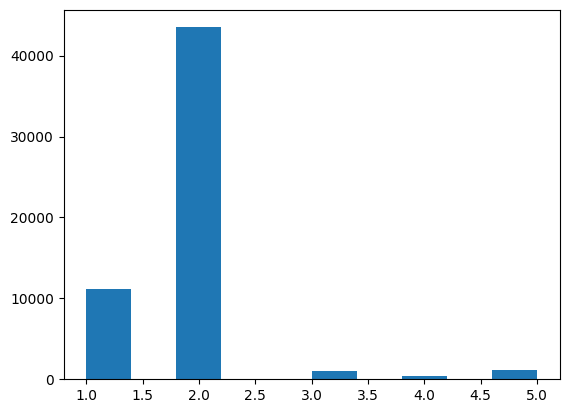

gender ------> int32
age


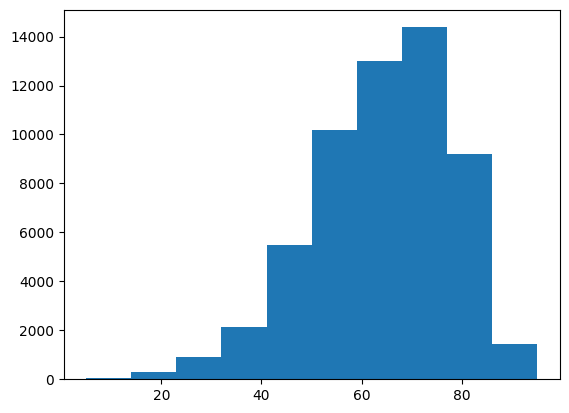

admission_type_id ------> object
discharge_disposition_id ------> object
admission_source_id ------> object
time_in_hospital


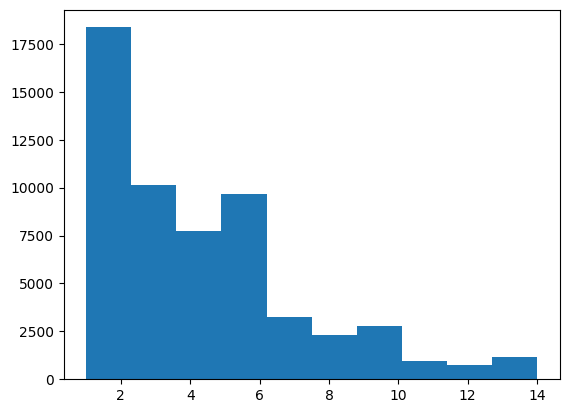

num_lab_procedures


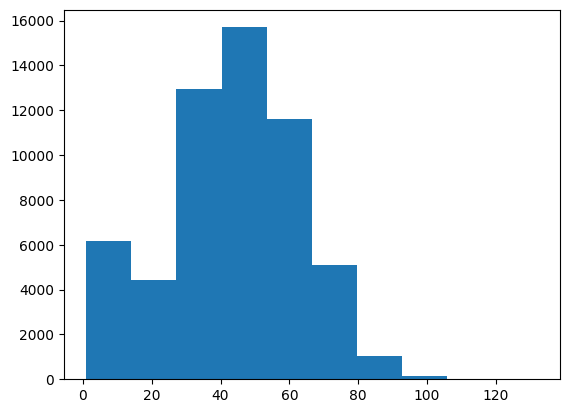

num_procedures


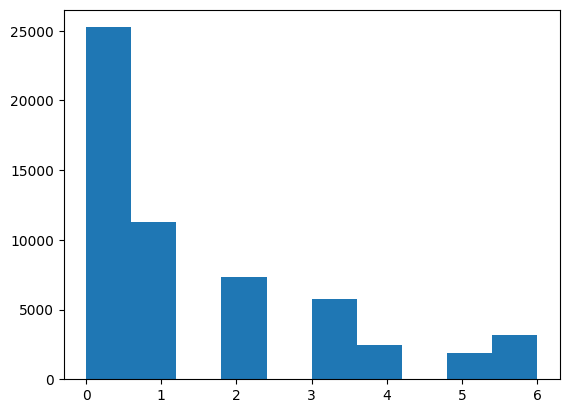

num_medications


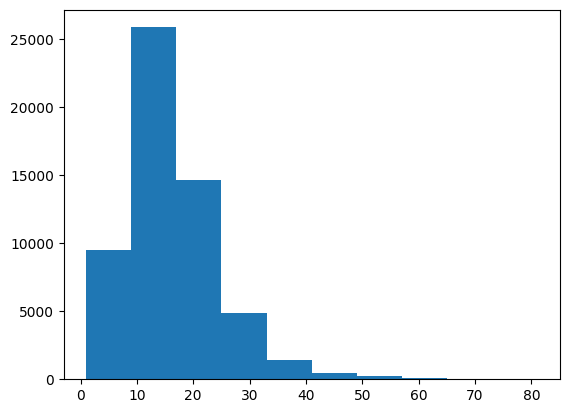

diag_1 ------> int32
diag_2 ------> int32
diag_3 ------> int32
number_diagnoses


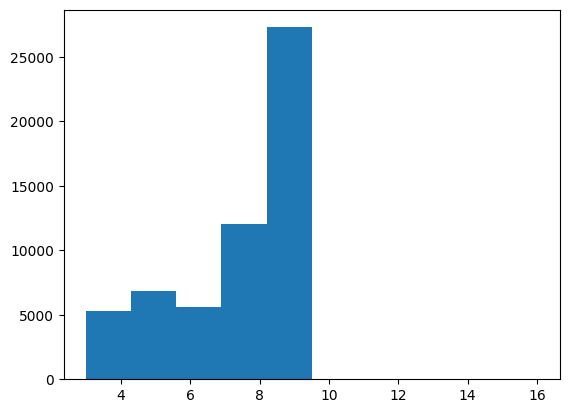

metformin


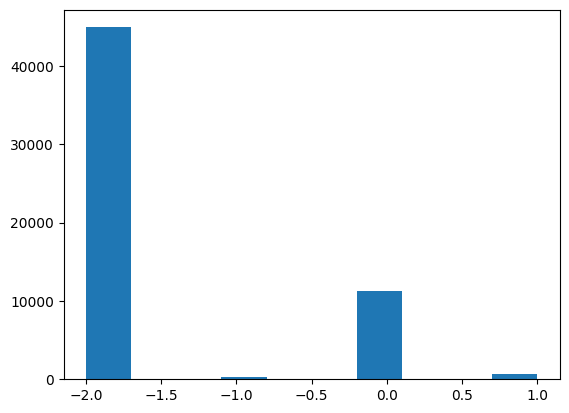

insulin


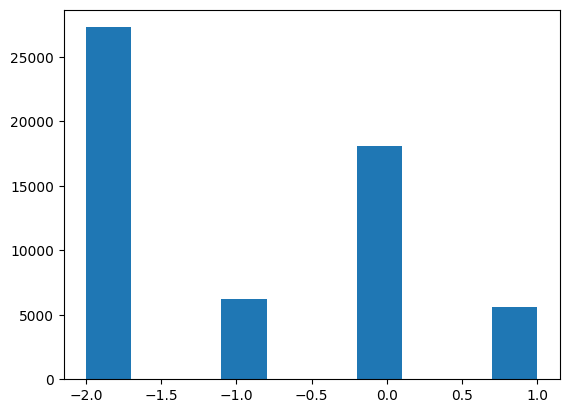

change


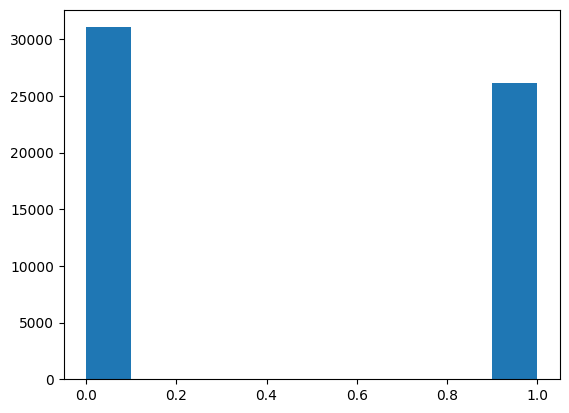

diabetesMed


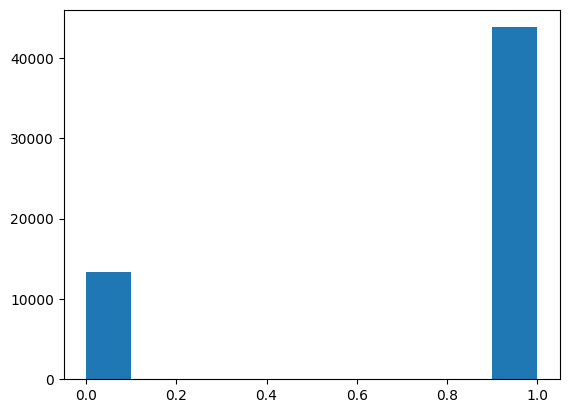

n_service_uses


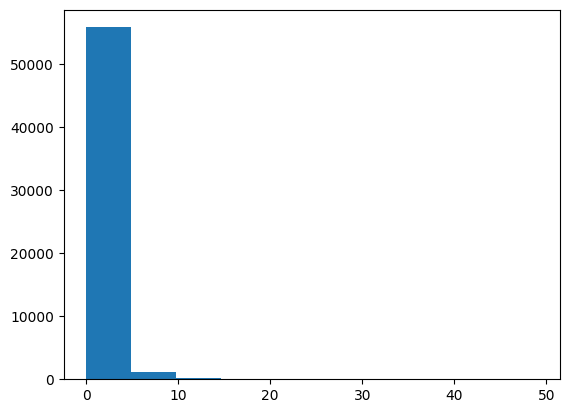

sqrt_n_service_uses ------> float64
medication/day ------> float64


In [83]:
from matplotlib import pyplot as plt
columns_to_transform=[]
for i in df.columns:
    if df[i].dtype!='int64':
        print(i,'------>',df[i].dtype)
    else:
        print(i)
        plt.hist(df[i])
        plt.show()